Q1 

-------Q1 (i)--------

 Addition

In [223]:
clear

In [ ]:
import time
start_time = time.time()
result   = 0
for i in range (1,(10**6)+1):
    result = result + i
end_time = time.time()
consumed_time = end_time-start_time
consumed_time_per_inst = consumed_time/(10**6)
print("Addition: Time Taken Total:",consumed_time)
print("Addition: Time Taken per operation:",consumed_time_per_inst)

Multiplication


In [24]:
import time
start_time = time.time()
result   = 1
for i in range (1,(10**6)+1):
    result = result * i
end_time = time.time()
consumed_time = end_time-start_time
consumed_time_per_inst = consumed_time/(10**6)
print("Multiplication: Time Taken Total:",consumed_time)
print("Multiplication: Time Taken per operation:",consumed_time_per_inst)

KeyboardInterrupt: 

Division

In [ ]:
import time
start_time = time.time()
result   = 1
for i in range (1,(10**6)+1):
    result = result / i
end_time = time.time()
consumed_time = end_time-start_time
consumed_time_per_inst = consumed_time/(10**6)
print("Division: Time Taken Total:",consumed_time)
print("Division: Time Taken per operation:",consumed_time_per_inst)

   -------Q1 (ii)--------

In [349]:
import math
from math import log10, floor

def round_for_n_sig_figures(number:float,sig_digits):
    if number==0:
        return 0
    else:
        return round(number,sig_digits-int(math.floor(math.log10(abs(number)))) - 1)

def guass_elimination(A:list,sig_digits:int=5,enable_pivot:bool = False,debug=False):
    #print("Starting Guasian Elimination on ",A," Significant Digits=",sig_digits," Pivoting:",enable_pivot)
    no_of_rows= len(A)
    no_of_cols = len(A[0])
    no_of_div = 0;
    no_of_add = 0;
    no_of_mul = 0;    
    if debug==True:
        print("No of Cols:",no_of_cols," Rows:",no_of_rows)
    i_col=0;
   
    for i_col in range (0,no_of_cols-1): 
        if enable_pivot==True :            
            max_pivot = abs(A[i_col][i_col])
            max_index = i_col
            for i_row in range (i_col,no_of_rows):
                if(max_pivot<abs(A[i_row][i_col])):
                    max_index = i_row
                    max_pivot = abs(A[i_row][i_col])
            if  max_index!= i_col:
                if debug:
                    print("Pivot changed before ",A)
                buff = A[i_col]
                A[i_col] = A[max_index]
                A[max_index] = buff                                
                if debug:
                    print("Pivot changed After",A)                

                
        for i_row in range (i_col+1,no_of_rows):
            if(A[i_col][i_col]==0):
                continue
            m = A[i_row][i_col]/A[i_col][i_col]
            m = round_for_n_sig_figures(m,sig_digits) # (n-1) divisions            
            no_of_div=no_of_div+1
            if debug:
                print("m is",m)
            for j in range (i_col,no_of_cols): 
                A[i_row][j]=A[i_row][j] - round_for_n_sig_figures(A[i_col][j]*m,sig_digits)   # n multiplications , n substractions
                A[i_row][j]=round_for_n_sig_figures(A[i_row][j],sig_digits)
                no_of_add = no_of_add + 1
                no_of_mul = no_of_mul + 1
    
    #print("REF is ",A)
    print("No of Divisions",no_of_div," Additions",no_of_add," Multiplications",no_of_mul )    
    


In [331]:
# TRIAL1
A1 = [[1, 1, 1], 
    [2, 3, 7],
    [4, 6, -2]]
guass_elimination(A1,5,False,False) #without Pivot

No of Divisions 3  Additions 8  Multiplications 8


In [322]:
# TRIAL2
A2 = [[1, 1, 1], 
    [2, 3, 7],
    [4, 6, -2]]

guass_elimination(A2,5,True,False) # With pivot

No of Divisions 3  Additions 8  Multiplications 8


In [323]:
# TRIAL3
A3 = [[5, 1, 1,4,10], 
    [2, 7, 7, 2,20],
    [4, 6, -9,1,40],
    [8, 2, 1,10,80]]
guass_elimination(A3,5,False,False)#without Pivot

No of Divisions 6  Additions 26  Multiplications 26


In [221]:
# TRIAL4
A4 = [[5, 1, 1,4,10], 
    [2, 7, 7, 2,20],
    [4, 6, -9,1,40],
    [8, 2, 1,10,80]]
guass_elimination(A4,5,True,False)#with Pivot

Starting Guasian Elimination on  [[5, 1, 1, 4, 10], [2, 7, 7, 2, 20], [4, 6, -9, 1, 40], [8, 2, 1, 10, 80]]  Significant Digits= 5  Pivoting: True
REF is  [[8, 2, 1, 10, 80], [0, 6.5, 6.75, -0.5, 0], [0, 0, -14.692, -3.6154, 0], [0, 0, 0, -2.4254, -40.0]]
No of Divisions 6  Additions 26  Multiplications 26


-------Q1 (iii)--------

In [335]:
import random
def generate_random_A(size:int):
    A=[]
    randomlist = []
    for j in range(0,size):
        randomlist = []
        for k in range(0,size):
            n=round_for_n_sig_figures(10*random.random(),5)   
            randomlist.append(n)
        A.append(randomlist)
    return A

def generate_random_B(size:int):
    B = []
    for i in range(0,size):
        n=round_for_n_sig_figures(10*random.random(),5)   
        B.append(n)
    return B

def generate_augemented(A:list,B:list):
    import numpy
    AT=list(numpy.transpose(A))
    BT=list(numpy.transpose(B))
    AT.append(BT)
    AB=numpy.transpose(AT)
    return AB



In [333]:
# Without Pivoting
for i in range(100,1100,100):
    A=generate_random_A(i)
    B=generate_random_B(i)
    AB=generate_augemented(A,B)
    print("For ",i,"x",i)
    guass_elimination(AB,5,False,False)

For  100 x 100
No of Divisions 4950  Additions 338250  Multiplications 338250
For  200 x 200
No of Divisions 19900  Additions 2686500  Multiplications 2686500
For  300 x 300
No of Divisions 44850  Additions 9044750  Multiplications 9044750
For  400 x 400
No of Divisions 79800  Additions 21413000  Multiplications 21413000
For  500 x 500
No of Divisions 124750  Additions 41791250  Multiplications 41791250
For  600 x 600
No of Divisions 179700  Additions 72179500  Multiplications 72179500
For  700 x 700
No of Divisions 244650  Additions 114577750  Multiplications 114577750
For  800 x 800
No of Divisions 319600  Additions 170986000  Multiplications 170986000
For  900 x 900
No of Divisions 404550  Additions 243404250  Multiplications 243404250
For  1000 x 1000
No of Divisions 499500  Additions 333832500  Multiplications 333832500


In [334]:
 #With Pivoting
for i in range(100,1100,100):
    A=generate_random_A(i)
    B=generate_random_B(i)
    AB=generate_augemented(A,B)
    print("For ",i,"x",i)
    guass_elimination(AB,5,True,False)

For  100 x 100
No of Divisions 4950  Additions 338250  Multiplications 338250
For  200 x 200
No of Divisions 19900  Additions 2686500  Multiplications 2686500
For  300 x 300
No of Divisions 44850  Additions 9044750  Multiplications 9044750
For  400 x 400
No of Divisions 79800  Additions 21413000  Multiplications 21413000
For  500 x 500
No of Divisions 124750  Additions 41791250  Multiplications 41791250
For  600 x 600
No of Divisions 179700  Additions 72179500  Multiplications 72179500
For  700 x 700
No of Divisions 244650  Additions 114577750  Multiplications 114577750
For  800 x 800
No of Divisions 319600  Additions 170986000  Multiplications 170986000
For  900 x 900
No of Divisions 404550  Additions 243404250  Multiplications 243404250
For  1000 x 1000
No of Divisions 499500  Additions 333832500  Multiplications 333832500


In [358]:
for i in range(10,310,10):
    A=generate_random_A(i)
    B=generate_random_B(i)
    AB=generate_augemented(A,B)
    
    start_time=time.time()     
    guass_elimination(AB,5,True,False)
    end_time=time.time()
    print("For ",i,"x",i," Pivot Time taken",end_time-start_time) 
    
    start_time=time.time()    
    guass_elimination(AB,5,False,False)
    end_time=time.time()
    print("For ",i,"x",i," Non-Pivot Time taken",end_time-start_time)


No of Divisions 42  Additions 364  Multiplications 364
For  10 x 10  Pivot Time taken 0.0
No of Divisions 42  Additions 364  Multiplications 364
For  10 x 10  Non-Pivot Time taken 0.0
No of Divisions 162  Additions 2654  Multiplications 2654
For  20 x 20  Pivot Time taken 0.062491416931152344
No of Divisions 171  Additions 2713  Multiplications 2713
For  20 x 20  Non-Pivot Time taken 0.03774738311767578
No of Divisions 407  Additions 9229  Multiplications 9229
For  30 x 30  Pivot Time taken 0.1783454418182373
No of Divisions 418  Additions 9304  Multiplications 9304
For  30 x 30  Non-Pivot Time taken 0.12236952781677246
No of Divisions 660  Additions 20620  Multiplications 20620
For  40 x 40  Pivot Time taken 0.38532280921936035
No of Divisions 718  Additions 21352  Multiplications 21352
For  40 x 40  Non-Pivot Time taken 0.2783796787261963
No of Divisions 1054  Additions 40424  Multiplications 40424
For  50 x 50  Pivot Time taken 0.7547426223754883
No of Divisions 1184  Additions 4232

KeyboardInterrupt: 

In [381]:
timing_pivot=[0.55474,4.5236,12.944,28.7182,59.53633,94.34855,155.6689,220.29784,331.0074,442.6948]
timing_non = [0.67246,4.9149,14.153,28.8637,60.45111,95.97327,156.2639,220.99651,331.5984,443.1852]
n= [100,200,300,400,500,600,700,800,900,1000]
import numpy
timing_pivot_log=numpy.log10(timing_pivot)
timing_non_log=numpy.log10(timing_non)
n_log=numpy.log10(n)

Text(0, 0.5, 'Log(Time(s))')

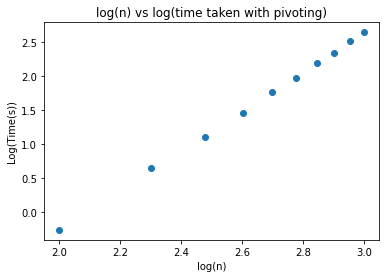

In [390]:
import matplotlib.pyplot as plt
plt.scatter(n_log,timing_pivot_log,label="Pivoting")
plt.title("log(n) vs log(time taken with pivoting)")
plt.xlabel("log(n)")
plt.ylabel("Log(Time(s))")

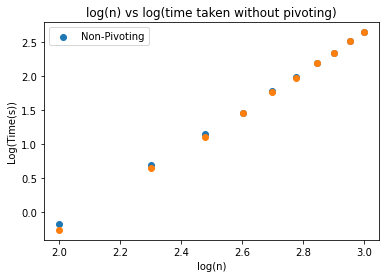

In [391]:
plt.scatter(n_log,timing_non_log,label="Non-Pivoting")
plt.scatter(n_log,timing_pivot_log)
plt.title("log(n) vs log(time taken without pivoting)")
plt.xlabel("log(n)")
plt.ylabel("Log(Time(s))")
plt.legend()